## 1. 데이터 탐색
- amount : 거래금액

- time : 거래된 기간

- V1 ~ V17 : 비식별된 칼럼

In [ ]:
# 필수 라이브러리 및 데이터셋 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import koreanize_matplotlib

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 1-1. 데이터의 특징을 파악하시오. EDA

In [ ]:
# df = pd.read_csv('problem1.csv', encoding='cp949')
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem1.csv', encoding='cp949')
print(df.info())

df.rename(columns={'Class': 'class', 'Time':'time', 'Amount':'amount'}, inplace=True)
display(df.head())

In [ ]:
df.isna().sum()

- 데이터셋은 총 1,234개의 row로 이루어져 있으며, feature는 모두 수치형, 20개이다. 
- 이 중 label인 class는 0과 1로 이루어진 명목변수이다.
- time은 거래된 기간이며, 연속형 수치형 변수이다.

In [4]:
# 통계량 확인: v1 ~ amount
display(df[df.columns[:-1]].describe())
# label(종속변수) 비율 확인
print("<각 레이블 갯수>")
df['class'].value_counts()

,time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,amount
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.00000
mean,91514.485331,-0.755027,0.543730,-1.148224,0.777816,-0.409181,-0.283953,-0.852545,0.145026,-0.446390,-0.904275,0.656342,-1.014185,0.011973,-1.168346,0.019232,-0.629529,-1.070657,88.88570
std,47896.081947,3.622262,2.663928,3.908787,2.345566,2.702077,1.507579,3.396565,2.471559,1.664075,2.902608,1.957200,2.996734,1.013383,3.230613,0.908008,2.269400,3.812768,220.14133
min,60.000000,-30.552380,-33.644637,-31.103685,-4.294888,-22.105532,-10.886820,-37.060311,-37.353443,-11.126624,-23.228255,-2.651584,-17.228662,-2.800154,-18.493773,-4.498945,-14.129855,-25.162799,0.00000
25%,50265.000000,-1.302600,-0.435358,-1.609339,-0.610310,-0.842184,-1.017863,-0.806043,-0.219328,-1.039740,-0.883807,-0.601391,-0.967306,-0.692559,-0.950226,-0.549590,-0.701499,-0.682272,3.54000
50%,81797.000000,-0.302521,0.231973,-0.234204,0.327567,-0.073622,-0.379633,-0.084983,0.073036,-0.210455,-0.226471,0.283080,-0.014046,0.023014,-0.099055,0.046894,-0.055831,-0.152578,20.99000
75%,136995.000000,1.249960,1.112040,0.811507,1.335332,0.684224,0.302350,0.464553,0.454794,0.452561,0.287274,1.212163,0.512121,0.699744,0.419194,0.660619,0.458139,0.368286,77.49000
max,172676.000000,2.320621,19.167239,3.324665,12.114672,15.275762,6.268481,8.123589,20.007208,5.916809,7.135948,11.669205,3.106650,3.068228,3.886382,2.869424,3.139656,6.739384,3335.73000


<각 레이블 갯수>


0    993
1    200
Name: class, dtype: int64

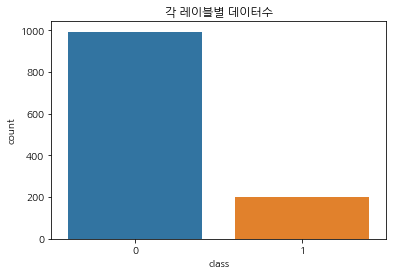

In [5]:
# 먼저 레이블 비율을 barplot 으로 표시
sns.countplot(df['class'])
plt.title("각 레이블별 데이터수")
plt.show()

- class의 불균형이 매우 심하며, 이상거래 탐지인만큼 이상 데이터(1)가 정상 거래에 비해 확연히 적은 것을 볼 수 있다.

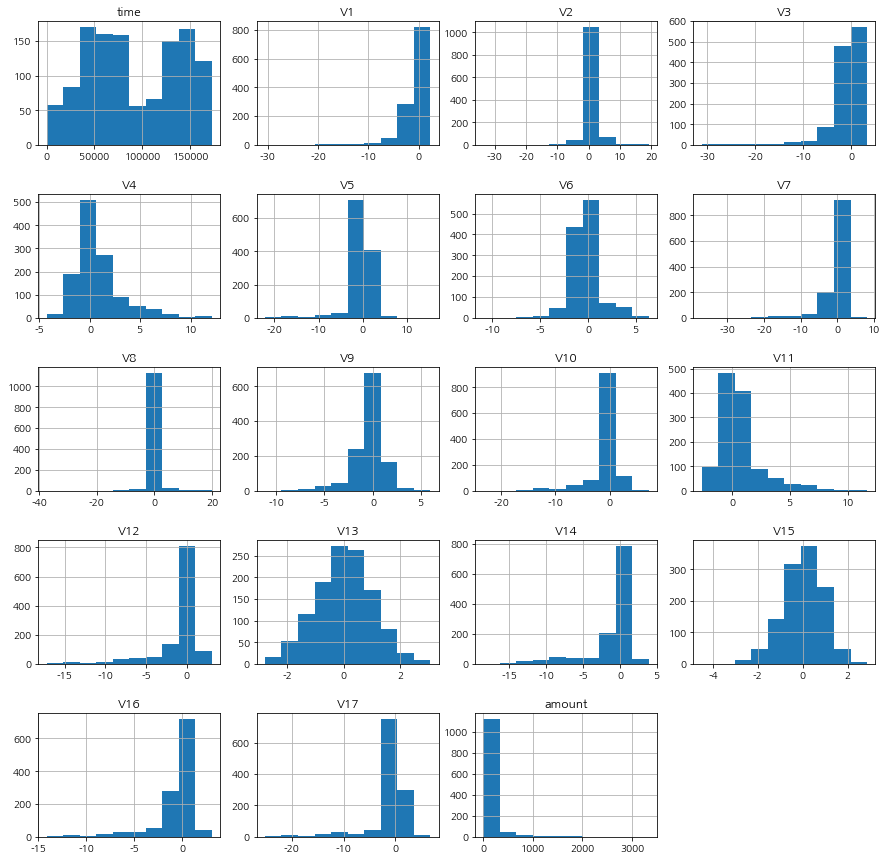

In [6]:
# 다음은 수치형 데이터의 히스토그램을 통해 데이터 분포를 시각적으로 확인
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
col_list = df.columns[:-1]
for i, col in enumerate(col_list):
    x = i // 4
    y= i % 4
    df[col].hist(ax=ax[x, y])
    ax[x, y].set_title(col)
ax[4, 3].remove() #안쓰는 plot 삭제
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

```
각 feature의 분포를 살펴보면 v1~17 변수는 0을 중심으로 분포해 있고, 
time은 5000, 12000에서 이봉분포를 보이고 있다.
amount는 0~72.75 사이에 75% 의 데이터값이 모여있는 왜도가 -인 분포를 보이고 있다.
각 변수들 간 이상치 데이터가 보이고 있으나,
해당 문제는 이상치 탐지(anomaliy detection) 문제이므로, 이상치를 삭제하지 않고
모델에 잘 반영하여 학습함으로써 이상치를 탐지하도록 한다.
```

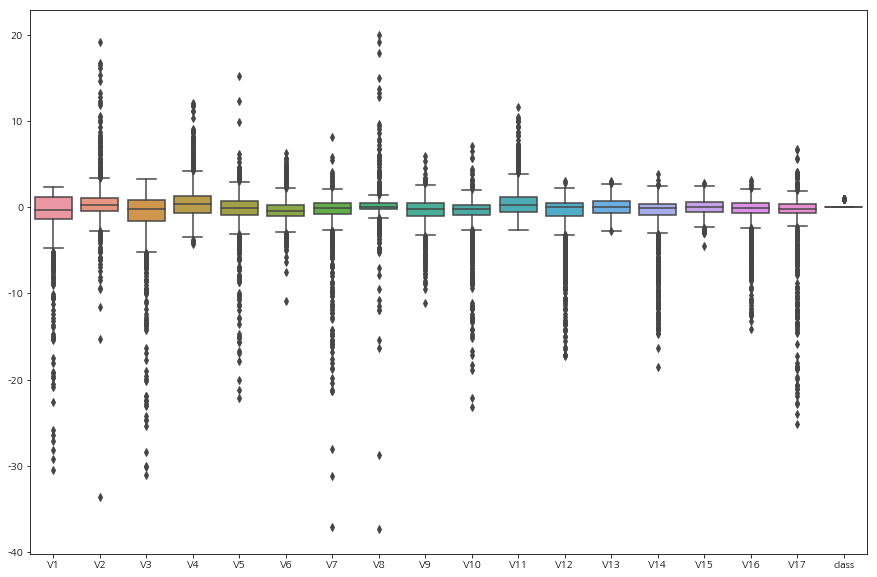

In [7]:
# box plot으로 이상치 확인
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['amount', 'time'], axis=1))
plt.show()

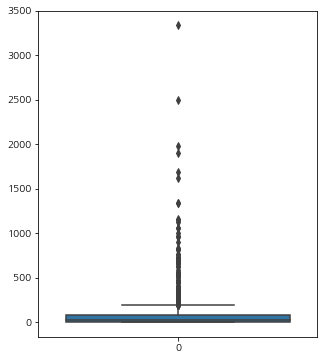

In [8]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df['amount'])
plt.show()

```
상자 그림 상에도 이상치가 보이고 있다.
다음으로는 각 변수 간의 상관관계를 살펴본다.
해당 데이터셋은 차원의 수가 20개 정도로 많기 떄문에
충분히 데이터를 설명할 수 있는 수준으로 차원축소를 하여 학습을 진행하는 것을 고려한다.
```

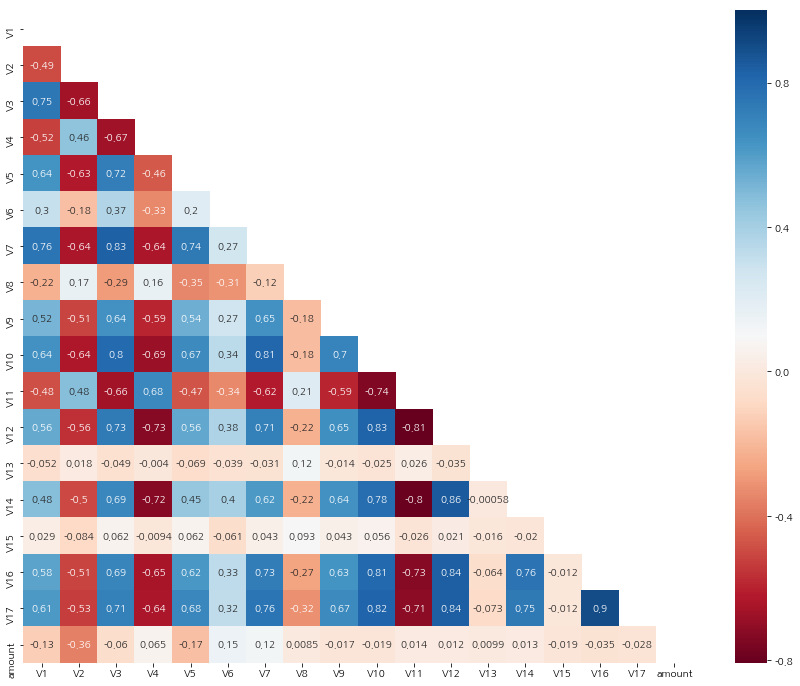

In [9]:
# feature간의 관계를 확인하는 것이므로 label인 class는 제외함
# 일단 선형적 corr인 pearson corr로 확인
plt.figure(figsize=(15, 12))
p_corr = df.drop(['class', 'time'], axis=1).corr()
#상삼각 마스크
mask = np.triu(np.ones_like(p_corr, dtype=bool))
sns.heatmap(p_corr, mask=mask, annot=True, cmap='RdBu')
plt.show()

- 각 변수들 간 양/음의 상관관계를 가지는 변수들이 많다.
- 예)
    - v12 ~ 17은 0.71로 양의 상관관계, 
    - v11 ~ v17은 -0.47로 음의 상관관계를 가진다.

## 2. 차원축소가 필요한지 검토하시오. 2개 이상의 후보 알고리즘을 비교하고, 1개를 추천하시오.

- 위 데이터는 충분히 변수들 간의 상관관계가 높다고 볼 수는 없지만... 있다 치고
```
각 변수들 간 양/음의 상관관계가 많으며, 변수의 수가 많으므로 차원축소를 통해 적절한 설명력을 만족하는 저차원의 모델을
사용하는 것으로 결정한다.
```
- 상관관계가 많다는 것은 **변수 간 중복 정보(선형 종속성)**가 있다는 의미이고,

- 차원 축소(PCA 등)는 주요 정보는 유지하면서 중복된 변수를 제거해 분석 성능 및 해석력을 높일 수 있음

**이 문제에서는 일반적으로 널리 사용되는 주성분분석(PCA)와 지도학습 기반인 선형판별분석(LDA)를 비교한다.**
```
- PCA: 데이터의 분산을 최대한 보존하는 방향으로 새로운 축(주성분)을 찾아 상관관계가 있는 변수들을 새로운 축에 
       직교화 된 축으로 변환하여 중복을 제거하는 방식, 각 변수들 간 설명력 정도를 직관적으로 확인 가능, 비지도학습
- LDA: 클래스 간 분리를 최대화하고 클래스 내 분산을 최소화하는 축을 찾음. 클래스 정보를 반영하여 성능이 높은 저차원모델 학습
       (지도학습)
```   
- 해당문제는 레이블이 불균형하여 클래스 간 분리 설명모델보다는, 데이터 자체를 적절히 잘 설명하는 
  저차원 모델이 필요하므로 PCA를 활용한다.

- 먼저 불필요한 feature를 제거하고, feature간 스케일을 맞춰준다.
- 각 feature간 scale이 맞지 않으면 모델 성능에 좋지 않은 영향을 준다.

해당 문제에서는 amount의 scale을 특히 맞춰주어야 하며, time은 분산을 살펴봤을 때도

유의미한 값을 도출하기 어려워보이며, 해당 문제는 시계열 모형이 아니기 때문에 제거한다.

- 데이터 누설(leakage)을 막기 위해 PCA 전 정규화부터 데이터셋을 나눠준다.
* 정규화와 PCA, 모델 학습은 train set으로만 해야함.


In [10]:
df2 = df.drop(['time', 'class'], axis=1)
Y = df['class'].copy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 정규화 전 train/test set 분할한다. 정규화는 훈련데이터 기준으로 해야하기 때문이다.
train_X, test_X, train_Y, test_Y = train_test_split(df2, Y, random_state=0, test_size=0.2)

scaler = StandardScaler()

# v1~ amount까지의 feature의 스케일을 정규분포로 맞춰준다.
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=df2.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=df2.columns)
display(train_X.head(3))
train_X.describe()
print(train_X.shape, test_X.shape)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,amount
0,0.536084,-0.371487,0.514740,-0.701871,-0.259292,0.140539,-0.022735,0.062704,1.368504,-0.028234,0.306606,0.603572,-1.490878,0.463666,1.044592,0.066035,0.260679,-0.403235
1,0.036255,0.133209,0.115213,-0.676747,0.522786,0.114904,0.427578,0.092589,-0.065955,0.154236,-0.697429,0.502180,0.622337,0.529747,-0.906270,0.543029,-0.040311,-0.265177
2,0.267765,0.183327,0.117213,-0.343079,0.457475,-0.624339,0.690617,-0.227671,0.143281,-0.104740,-0.632729,0.367583,0.220103,0.062185,-0.054839,0.126290,0.478381,-0.190290


(954, 18) (239, 18)


In [11]:
display(test_X.describe())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,amount
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.020329,0.173561,-0.065559,0.041646,-0.031969,-0.040866,-0.122919,-0.079477,-0.027563,-0.121842,-0.009125,-0.089834,0.064623,-0.074002,-0.080393,-0.024749,-0.103823,-0.177488
std,1.031059,0.946556,1.097582,1.028656,1.042875,1.030590,1.356582,1.213536,1.157400,1.269739,1.123486,1.167185,0.975687,1.087507,1.037753,1.147897,1.187681,0.463103
min,-7.136471,-2.008260,-7.592504,-2.070906,-6.533626,-2.745312,-11.556303,-12.255978,-6.638032,-8.180587,-1.520565,-5.624388,-2.614780,-5.476954,-5.032659,-5.342553,-6.598758,-0.407419
25%,-0.143200,-0.252716,-0.138147,-0.578306,-0.134468,-0.569741,-0.002567,-0.172354,-0.297317,-0.058681,-0.728748,-0.034672,-0.514792,0.043658,-0.731663,0.011964,0.065203,-0.399093
50%,0.151108,-0.008504,0.189369,-0.163813,0.130367,-0.224363,0.231047,-0.063958,0.158737,0.210074,-0.285636,0.324484,0.049198,0.302822,-0.007301,0.295696,0.214815,-0.350438
75%,0.570499,0.307156,0.483951,0.225806,0.410695,0.299444,0.387602,0.102115,0.593987,0.365925,0.184833,0.488598,0.689295,0.476646,0.622880,0.520064,0.362531,-0.180250
max,0.828138,6.969817,1.123205,4.446049,2.292098,4.365588,1.398218,5.722558,3.946076,2.707650,5.770475,0.978171,3.015358,1.191442,2.170555,1.183078,1.386180,2.798720


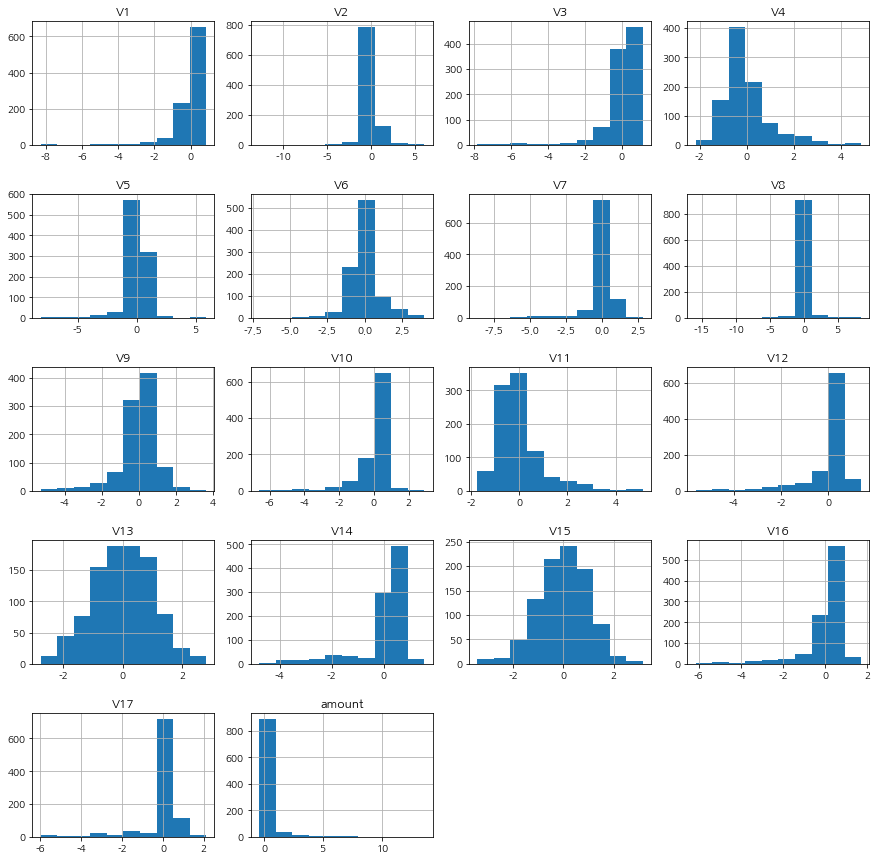

In [13]:
# 다음은 수치형 데이터의 히스토그램을 통해 데이터 분포를 시각적으로 확인
fig, ax = plt.subplots(5, 4, figsize=(15, 15))
col_list = train_X.columns
for i, col in enumerate(col_list):
    x = i // 4
    y= i % 4
    train_X[col].hist(ax=ax[x, y])
    ax[x, y].set_title(col)
ax[4, 3].remove() #안쓰는 plot 삭제
ax[4, 2].remove() #안쓰는 plot 삭제
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

- amount가 평균 0을 기준으로 분포(var=1)하는 스케일링이 된 것을 확인할 수 있으며, 나머지 수치형 변수도 마찬가지로 스케일링되었다.
- 다음은 PCA의 각 변수별 분산 설명력을 확인 후 PCA 통해 저차원 데이터로 변환한다.

## 3. 추천한 알고리즘을 구현하고, 정당성을 제시하시오.

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
p_fit = pca.fit(train_X)

print("< PCA 분석결과 >")
p_result = pd.DataFrame({"feature": train_X.columns, 
                        "고윳값": p_fit.singular_values_, 
                        "분산설명률": p_fit.explained_variance_ratio_, 
                        "누적 분산설명률": np.cumsum(p_fit.explained_variance_ratio_)})

display(p_result)

< PCA 분석결과 >


,feature,고윳값,분산설명률,누적 분산설명률
0,V1,93.618521,0.510391,0.510391
1,V2,35.650578,0.074014,0.584404
2,V3,34.185548,0.068056,0.652460
3,V4,31.799046,0.058885,0.711345
4,V5,30.344203,0.053620,0.764966
5,V6,29.442434,0.050481,0.815447
6,V7,25.081239,0.036633,0.852080
7,V8,21.759212,0.027572,0.879652
8,V9,20.659093,0.024854,0.904506
9,V10,19.125770,0.021302,0.925808


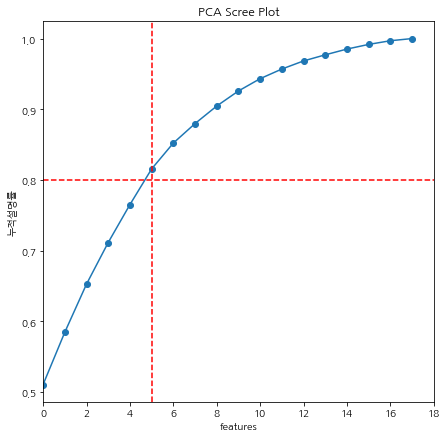

In [15]:
plt.figure(figsize=(7, 7))
plt.plot(p_result['누적 분산설명률'], marker='o')
plt.title('PCA Scree Plot')
plt.xlabel('features')
plt.ylabel("누적설명률")
plt.axvline(x=5, color='red', linestyle='--')
plt.axhline(y=0.8, color='red', linestyle='--')
plt.xlim(0, 18)
plt.show()

In [17]:
# 누적설명률이 0.8 이상인 feature 수: 6를 선택한다.
pca_r = PCA(n_components=6)

train_X = pd.DataFrame(pca_r.fit_transform(train_X), columns=train_X.columns[:6])
test_X =  pd.DataFrame(pca_r.transform(test_X), columns=train_X.columns[:6])

train_X.head()

,V1,V2,V3,V4,V5,V6
0,-1.178851,-0.421287,-0.350137,-1.023558,-1.428261,-0.026321
1,-1.077971,-0.164943,0.929735,0.662723,0.509357,-0.223675
2,-0.865907,-0.446792,0.151450,-0.186306,0.482599,-0.269478
3,-1.171317,-0.105448,1.138310,0.223213,0.627500,0.342708
4,7.925550,-1.206190,-2.506497,0.409594,0.759476,-0.234980


누적 설명률이 80% 이상인 8개 차원의 데이터셋으로 변환하였다.

이는 원본데이터의 정보를 82%가량 설명하는 데이터셋으로 변환되었음을 의미한다.

## 4. Over sampling / under sampling의 장단점을 기술하시오. 적절한 샘플링을 제안하고 구현하시오.

1. Over sampling: 소수 레이블에 해당하는 데이터수를 늘리는 방식이다.(Random Oversampling, SMOTE, ADASYN)
    - 장점: 데이터의 정보손실이 없으며, 소수 클래스의 패턴학습이 가능
    - 단점: 랜덤 오버샘플링처럼 소수데이터를 단순복제할 경우 과적합 위험
2. under sampling: 다수 레이블에 해당하는 데이터를 제거하여 레이블 간 균형을 맞추는 방식(Random Undersampling, Nearmiss)
    - 장점: 전체 데이터수가 줄어 연산량이 줄어듬
    - 단점: 정보손실이 있음
        
해당 데이터셋은 소수 레이블이 크게 적어서 under samping을 시행 시 정보손실이 아주 크므로, Oversampling을 시행한다.
- 과적합을 줄이기 위해 kmeans_SMOTE를 활용한다.(데이터 누수를 막기 위해 train/test셋으로 분할 후 train에만 적용)
+ 비교군: randomoversampling

In [18]:
from collections import Counter

from imblearn.over_sampling import KMeansSMOTE, RandomOverSampler

k_smt = KMeansSMOTE(random_state=0, k_neighbors=3)
k_train_X, k_train_Y = k_smt.fit_resample(train_X, train_Y)

#비교군인 Randomoversampling
ro = RandomOverSampler(random_state=0)
r_train_X, r_train_Y = ro.fit_resample(train_X, train_Y)

print(f"KMeans SMOTE의 레이블별 데이터수: {Counter(k_train_Y)}")
print(f"Random Over Sampling의 레이블별 데이터수: {Counter(r_train_Y)}")


Using TensorFlow backend.


KMeans SMOTE의 레이블별 데이터수: Counter({1: 795, 0: 793})
Random Over Sampling의 레이블별 데이터수: Counter({0: 793, 1: 793})


- 두 oversampling 기법의 성능을 테스트셋으로 평가해 본다.

일반적으로는 f1 score나 auc score를 성능지표로 판단하지만, 이 데이터는 사기를 놓치지 않고 사기(true) 라고 판별해내는 것이

중요한 모델이므로 재현율을 가장 우선적으로 보고(f2 score) f1, auc score는 보조지표로 활용한다.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score

dt_title = ['kmeans_smote', 'random_over_sampling']
dt_list = [(k_train_X, k_train_Y), (r_train_X, r_train_Y)]

for df, title in zip(dt_list, dt_title):
    lr = LogisticRegression(max_iter=300)
    lr.fit(df[0], df[1])
    pred_train = lr.predict(df[0])
    pred_test = lr.predict(test_X)
    cm = confusion_matrix(test_Y, pred_test, labels=[0, 1])
    f2 = fbeta_score(test_Y, pred_test, beta=2)
    print(f"< {title} > ")
    display(pd.DataFrame(cm, index=['True label:0', "True label:1"], columns=['Predict label:0', 'Predict label:1']))
    print(f"f2 score: {f2:.3f}\n")

< kmeans_smote > 


,Predict label:0,Predict label:1
True label:0,199,1
True label:1,3,36


f2 score: 0.933

< random_over_sampling > 


,Predict label:0,Predict label:1
True label:0,196,4
True label:1,1,38


f2 score: 0.960



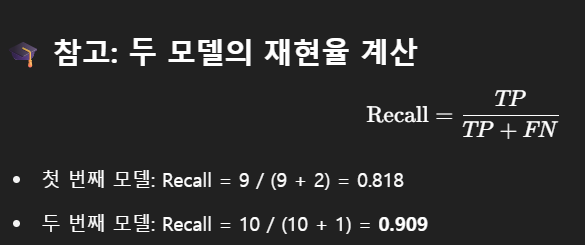
- 해당 문제는 재현율과 f2 score를 감안하여 random oversampling을 선택한다.
  * 단, 일반적인 경우에는 random oversampling 은 과적합으로 잘 사용하지 않는다.

## 5. 이전 결과를 활용하여 사기 분류 모델 2개를 구현하고 성능을 비교하시오.

- class가 2개인 분류문제이니, supervised learning calssification 모델 두 개를 구현한다.
- 일반적으로 성능이 좋은 앙상블 모델인 random forerest 와 Support vector를 활용하는 SVM Clssifier를 구현한다.
- 성능은 recall에 가중치를 주면서 정밀도 또한 고려한 f2 score를 활용하여 성능을 비교한다.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, classification_report

kf = KFold(n_splits=5, shuffle=True, random_state=0)

rf = RandomForestClassifier(random_state=0)

f2 = make_scorer(fbeta_score, beta=2, average='weighted')

#하이퍼파라미터
param1 = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
grid_f = GridSearchCV(
    estimator = rf, 
    param_grid = param1, 
    scoring= f2, 
    n_jobs= 1, 
    cv = kf
)

grid_f.fit(k_train_X, k_train_Y)

print(f"Best Params: {grid_f.best_params_}")
print(f"Best Score: {grid_f.best_score_:.2f}")

# 이제 test_set으로 예측 및 레포트 출력
print("<학습 데이터 결과>")
f_train_pred = grid_f.predict(k_train_X)
print(classification_report(k_train_Y, f_train_pred))

print("\n<테스트 데이터 결과>")
f_test_pred = grid_f.predict(test_X)
print(classification_report(test_Y, f_test_pred))
print(f"f2 score: {fbeta_score(test_Y, f_test_pred, beta=2):.5f}")

Best Params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.98
<학습 데이터 결과>
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       793
           1       1.00      0.97      0.98       795

    accuracy                           0.98      1588
   macro avg       0.98      0.98      0.98      1588
weighted avg       0.98      0.98      0.98      1588


<테스트 데이터 결과>
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.95      0.95      0.95        39

    accuracy                           0.98       239
   macro avg       0.97      0.97      0.97       239
weighted avg       0.98      0.98      0.98       239

f2 score: 0.94872


In [49]:
# 다음으로 SVM Classifier 모델
svm = SVC(random_state=0)

param2 = {
    'C': [0.01, 0.09, 0.01], 
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale', 'auto']
}

grid_s = GridSearchCV(
    estimator=svm, 
    param_grid=param2, 
    cv = kf, 
    scoring = f2, 
    n_jobs = 1
)

grid_s.fit(r_train_X, r_train_Y)

print(f"Best Params: {grid_s.best_params_}")
print(f"Best Score: {grid_s.best_score_:.2f}")

# 이제 test_set으로 예측 및 레포트 출력
print("<학습 데이터 결과>")
s_train_pred = grid_s.predict(k_train_X)
print(classification_report(k_train_Y, s_train_pred))

print("\n<테스트 데이터 결과>")
s_test_pred = grid_s.predict(test_X)
print(classification_report(test_Y, s_test_pred))
print(f"f2 score: {fbeta_score(test_Y, s_test_pred, beta=2):.5f}")


Best Params: {'C': 0.09, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.93
<학습 데이터 결과>
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       793
           1       0.99      0.97      0.98       795

    accuracy                           0.98      1588
   macro avg       0.98      0.98      0.98      1588
weighted avg       0.98      0.98      0.98      1588


<테스트 데이터 결과>
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       200
           1       0.97      0.97      0.97        39

    accuracy                           0.99       239
   macro avg       0.98      0.98      0.98       239
weighted avg       0.99      0.99      0.99       239

f2 score: 0.97436


In [50]:
# 데이터가 단순하고 수량이 적어서 완전히 똑같은 결과가 나왔다!
# 비교를 위해 logistic regression을 구현한다.
from sklearn.linear_model import LogisticRegression

lc = LogisticRegression(random_state=0, max_iter=300)

param3 = {'max_iter': [10, 30]}

grid_l = GridSearchCV(
    estimator = lc, 
    param_grid = param3,
    cv = kf, 
    scoring = f2, 
    n_jobs = 1
)

grid_l.fit(r_train_X, r_train_Y)

print(f"Best Params: {grid_l.best_params_}")
print(f"Best Score: {grid_l.best_score_:.2f}")

# 이제 test_set으로 예측 및 레포트 출력
print("<학습 데이터 결과>")
l_train_pred = grid_l.predict(k_train_X)
print(classification_report(k_train_Y, l_train_pred))

print("\n<테스트 데이터 결과>")
l_test_pred = grid_l.predict(test_X)
print(classification_report(test_Y, l_test_pred))
print(f"f2 score: {fbeta_score(test_Y, l_test_pred, beta=2):.5f}")



Best Params: {'max_iter': 30}
Best Score: 0.93
<학습 데이터 결과>
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       793
           1       0.98      0.98      0.98       795

    accuracy                           0.98      1588
   macro avg       0.98      0.98      0.98      1588
weighted avg       0.98      0.98      0.98      1588


<테스트 데이터 결과>
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       200
           1       0.90      0.97      0.94        39

    accuracy                           0.98       239
   macro avg       0.95      0.98      0.96       239
weighted avg       0.98      0.98      0.98       239

f2 score: 0.95960


- 결론: recall은 모두 동일하므로 재현율에 가중치를 두고 정밀도도 감안한 f2 score가 높은 random forerest 모델로 채택한다.
- f2 score: 0.98

In [23]:
print(f"<테스트셋 confusion matrix>")
pd.DataFrame(confusion_matrix(test_Y, f_test_pred), index=['Actual label:0', 'Actual label: 1'], columns = ['Pred label:0', 'Pred label:1'])

<테스트셋 confusion matrix>


,Pred label:0,Pred label:1
Actual label:0,198,2
Actual label: 1,2,37


## 6. 이상탐지(anomaly detection) 방법을 사용하여 신용카드 사기 데이터를 식별하시오.
- 2개 이상 탐지 방법(후보 알고리즘)을 도출하여 장단점을 비교하시오.

- 비지도학습인 KMeans clustering을 구현하고 비교한다. 이 모델을 쓰는 이유는 DBSCAN에 비해 하이퍼파라미터 없이
- 군집의 수만 지정하면 데이터의 분포만을 통해 분류하기 때문이다.
- 데이터의 분포가 중요하기 때문에 스케일링한 데이터 그대로를 오버샘플링 없이 사용한다.

In [25]:
train_X.shape, test_X.shape

((954, 6), (239, 6))

In [26]:
# 이미 위에 이상탐지 방법을 구현했는데 똑같은 문제가 왜 나온지 모르겠음.
# 그냥 이번에는 비지도 학습방법인 k-means clustering을 해봐야 하나?
# kmeans를 선택한 이유: 하이퍼파라미터를 정하지 않아도 됨

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state = 0, max_iter=1000)
km.fit(train_X)

# 각 샘플 중심점과 거리계산
dist = np.linalg.norm(train_X - km.cluster_centers_[km.labels_], axis=1)
#거리기준 이상치 설정
threshold = np.percentile(dist,78)
outliers = (dist > threshold).astype(int)

display(pd.DataFrame(confusion_matrix(train_Y, outliers), index=['Actual label:0', 'Actual label: 1'], columns = ['Pred label:0', 'Pred label:1']))
print(classification_report(train_Y, outliers))
print(f"f2 score: {fbeta_score(train_Y, outliers, beta=2):.2f}")

,Pred label:0,Pred label:1
Actual label:0,710,83
Actual label: 1,34,127


              precision    recall  f1-score   support

           0       0.95      0.90      0.92       793
           1       0.60      0.79      0.68       161

    accuracy                           0.88       954
   macro avg       0.78      0.84      0.80       954
weighted avg       0.90      0.88      0.88       954

f2 score: 0.74


```
레이블을 활용하는 지도학습(RandomForest, SVM)은 비지도학습(KMeans)보다 훨씬 높은 성능을 보였다.
해당 데이터셋은 소수 클래스(사기)의 비율이 매우 낮고, 전체 데이터 수도 많지 않아,
SMOTE와 같은 오버샘플링 기법을 적용하여 데이터의 불균형문제를 처리한 후 적용하는 지도학습 방식이 적절하다고 판단된다.

단, 레이블이 있는 데이터를 구하기 어려운 극단적인 상황에서는 비지도학습을 적용하는 것이 합리적일 것이다.
```

## 2. 문제 2(변형 문제)
- 2-1. 데이터가 과대 산포되어있는지 확인하시오. 

In [27]:
df2 = pd.read_csv('problem2.csv')
df2.info()
display(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ...1     314 non-null    int64 
 1   id       314 non-null    int64 
 2   gender   314 non-null    object
 3   math     314 non-null    int64 
 4   daysabs  314 non-null    int64 
 5   prog     314 non-null    object
dtypes: int64(4), object(2)
memory usage: 14.8+ KB


,...1,id,gender,math,daysabs,prog
0,1,1001,male,63,4,Academic
1,2,1002,male,27,4,Academic
2,3,1003,female,20,2,Academic
3,4,1004,female,16,3,Academic
4,5,1005,female,2,3,Academic


***데이터 설명***
- 총 314개 데이터, 6개의 변수가 있으며, 
- 수치형 변수: 4, 문자형 변수: 2
- 이 중 1번째 컬럼의 값은 무의미하며, id 값은 식별자로 object 형으로 변환하는 것이 적절함.

In [28]:
df2 = df2[df2.columns[1:]].astype({'id':'object'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       314 non-null    object
 1   gender   314 non-null    object
 2   math     314 non-null    int64 
 3   daysabs  314 non-null    int64 
 4   prog     314 non-null    object
dtypes: int64(2), object(3)
memory usage: 12.4+ KB


In [29]:
df2.describe()

,math,daysabs
count,314.000000,314.000000
mean,48.267516,5.955414
std,25.362391,7.036958
min,1.000000,0.000000
25%,28.000000,1.000000
50%,48.000000,4.000000
75%,70.000000,8.000000
max,99.000000,35.000000


```
과대산포는 분산이 평균보다 훨씬 큰 현상을 말한다. 여기서 두 수치형 독립변수의 산포를 알아본다.
과대산포의 여부는 포아송 분포나, 이항분포로 확인할 수 있다.
```

분산/평균: 13.33
분산/평균: 8.31


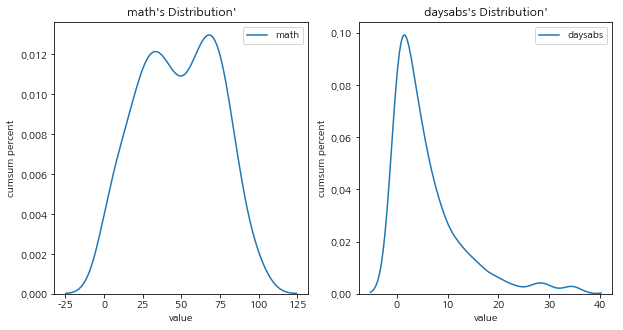

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i, col in enumerate(df2.select_dtypes('number').columns):    
    sns.kdeplot(data= df2[col], ax=ax[i])
    ax[i].set_title(f"{col}'s Distribution'")
    ax[i].set_xlabel("value")
    ax[i].set_ylabel("cumsum percent")
    print(f"분산/평균: {df2[col].var()/df2[col].mean():.2f}")
    
plt.show()

- 두 수치형 변수 모두 분산이 평균에 비해 상당히 높으므로 과대산포이다.

## 2. 포아송 회귀 모델과 음이항 회귀 모델 중 적합한 모델을 선택하고, 이유를 기술하시오.
```
포아송분포 모델은 평균과 분산이 같은 분포를 가정한다. 따라서 이 문제에서는 과대산포를 허용하는 음이항 회귀모델을
채택한다. 음이항 회귀는 포아송 모델에 분산 조절 인자를 추가함으로써 분산이 평균보다 클 수 있도록 설계되어 있으며,
실제 관측값의 산포가 클 때 더 좋은 예측 성능을 보여준다.
```

## 3. 모델 적합도 검정을 수행하시오.
***가설***
- H0(귀무가설): 모든 계수들이 0이다.
- H1(대립가설): 적어도 하나의 계수는 0이 아니다.

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


fit = smf.glm('daysabs ~ gender + math + prog', 
             data = df2, 
             family = sm.families.NegativeBinomial()).fit() # 종속변수 ~ 독립변수

# null deviance와 deviance
null_deviance = fit.null_deviance
deviance = fit.deviance
test_stat = round(null_deviance - deviance, 3)

#자유도 계산
df = fit.df_model #자유도(추정된 계수 수)
p_value = stats.chi2.sf(test_stat, df)
print(f"모델 적합도 검정 p-value: {p_value}")

모델 적합도 검정 p-value: 2.2337202493553e-14


 - 유의수준 5%(0.005) 에서 p-value가 0.005보다 적은 2.2337202493553e-14이므로 귀무가설을 기각한다.
   - 따라서 적어도 1개의 변수 계수는 0이 아니므로 모델이 데이터에 적합하다.

## 4. 각 회귀계수의 통계적 유의성에 관해 기술하시오.

In [32]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                daysabs   No. Observations:                  314
Model:                            GLM   Df Residuals:                      309
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.25
Date:                Mon, 09 Jun 2025   Deviance:                       348.13
Time:                        00:08:07   Pearson chi2:                     333.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1999
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.2825      0.150     15.255      0.000       1.989       2.576
gender[T.male]        -0.2108      0.124     -1.695      0.090      -0.454       0.033
prog[T.General]        0.4245      0.186      2.288      0.022       0.061       0.788
prog[T.Vocational]    -0.8279      0.146     -5.672      0.000      -1.114      -0.542
math                  -0.0062      0.003     -2.451      0.014      -0.011      -0.001
======================================================================================
"""

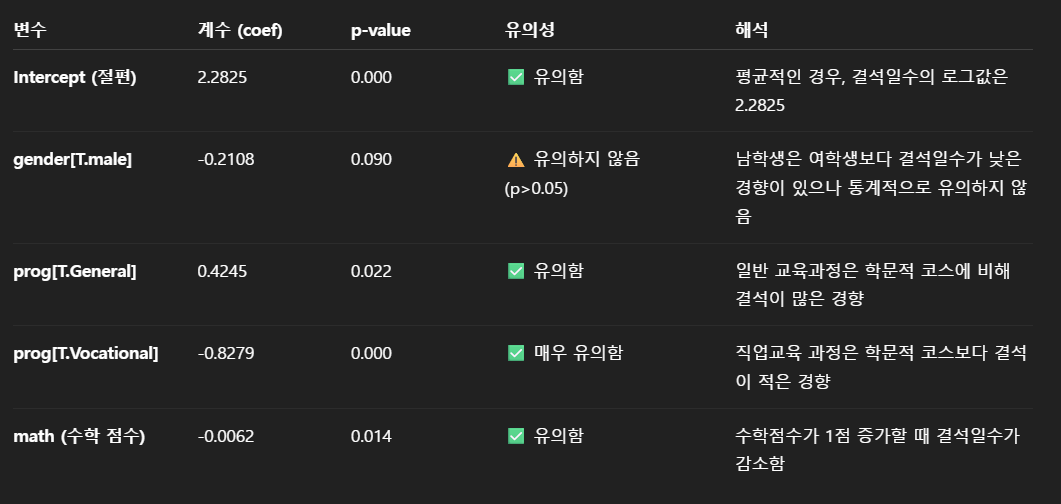

- Intercept(절편): 평균적인 결석일수의 로그값 2.2825
- Gender: -0.2108로 남학생은 여학생에 비해 결석일수가 적은 경향이 있으나, 해당변수는 통계적으로 유의하지 않음(0.09로 귀무가설 채택)
- prog: 0.4245로 일반 교육과정은 학문적 코스에 비해 결석이 많은 경향, p-value 0.022로 통계적으로 유의
      - 직업코스는 학문코스보다 결석이 적은 경향이며, 통계적으로 매우 유의
- math: 수학점수가 1점 증가할 때마다 결석이 -0.0062만큼 감소함. 통계적으로 매우 유의

#### prog, math 변수가 p-value 0.05 이하로 유의수준 5%에서 통계적으로 유의함
즉, 직업코스 수강 학생이거나, 수학 성적이 높을수록 결석이 적으며, 
일반 교육과정 학생의 결석은 많은 편임.

## 문제 3
2년 전 회사 매출이 200,000달러, 1년 전 회사 매출이 300,000달러, 그 후 서비스 품질의 개선으로 회사 매출이 500,000달러가 되었을 때,

연평균 매출 상승률의 대푯값을 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기)
- 조화평균 문제

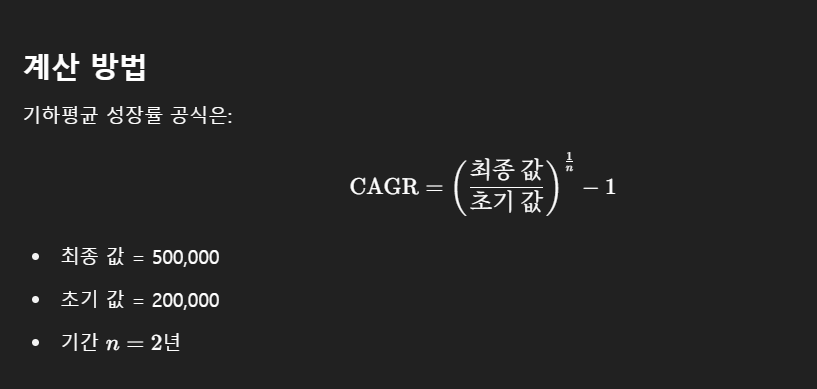

In [33]:
cagr = (500000 / 200000)**(1/2) -1

print(f"{cagr*100:.2f}%")

58.11%


## 문제 4
어느 대학교에서 무작위로 뽑은 20명의 학생들이 매주 운동하는 평균 시간이 시간으로 측정되었다. 

해당 데이터의 표본 평균은 6.2, 표본편차는 1.5 이다. 이 데이터를 바탕으로, 95% 신뢰수준에서 학생들이 매주 운동하는 시간의 모평균에 대한 신뢰구간을 구하시오.
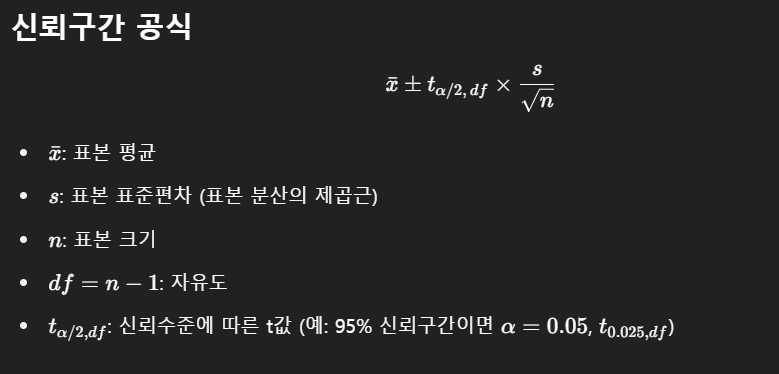

In [34]:
import math

# 표본분산을 제시하고 모평균 신뢰구간 추정하는 문제는 t분포 사용


mean_x = 6.2
df = 20-1
var_x = 1.5**2

t_25 = stats.t.ppf(1 - 0.05/2, df) #0.25 t값

down = mean_x - t_25*(np.sqrt(var_x)/np.sqrt(20))
up = mean_x + t_25*(np.sqrt(var_x)/np.sqrt(20))

print(f"신뢰구간: ({down:.3f} , {up:.3f})")


신뢰구간: (5.498 , 6.902)


## 문제 5
강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. 

(단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

## 1. 귀무가설과 대립가설을 설정하시오.
- 귀무가설 : 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 대립가설 : 상류와 하류의 생물 다양성 점수에 차이가 있다

두 집단이 종속적이기 때문에, 짝을 이룬다. 그리고 점수의 차이를 비교하는 문제이기 때문에

대응표본 t 검정(paired t-test) 문제이다.

In [35]:
df5 = pd.read_csv('problem5.csv')
display(df5.head())
df5.info()

,river,up,down
0,A,60.2,48.5
1,B,49.1,40.3
2,C,58.4,55.1
3,D,61.5,56.9
4,E,59.8,48.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   river   19 non-null     object 
 1   up      19 non-null     float64
 2   down    19 non-null     float64
dtypes: float64(2), object(1)
memory usage: 584.0+ bytes


In [36]:
df5.river.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S'], dtype=object)

## 2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 판단하시오.
- t검정, anova는 정규성을 가정하기 때문에 먼저 정규성을 확인해준다.
- shapiro-wilk 검정 및 시각화 확인을 해 보고 정규성을 만족하지 않으면 비모수 검정인 wilcoxon 부호순위 검정을 사용한다

<정규성 검정>
- 귀무가설 : 데이터가 정규분포를 따른다.
- 대립가설 : 데이터가 정규분포를 따르지 않는다.

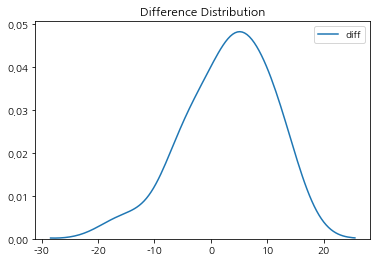

In [37]:
from scipy.stats import shapiro

df5['diff'] = df5['up'] - df5['down']

sns.kdeplot(data=df5['diff'])
plt.title('Difference Distribution')

plt.show()

In [38]:
# shapiro 검정
stat, p = shapiro(df5['diff'])
print(f"p-value: {p:.2f}")

p-value: 0.23


유의수준 5%에서 p-value가 0.23이므로 귀무가설을 기각할 수 없다. 

따라서 상류와 하류의 생물 다양성은 정규분포를 따른다.

정규성을 만족하기 때문에 paired t-test를 실시한다.

In [39]:
t_test_result = stats.ttest_rel(df5['up'], df5['down'])
print(f"통계량: {t_test_result.statistic}")
print(f"p-value: {t_test_result.pvalue:.5f}")

통계량: 1.7665772734750262
p-value: 0.09425


Shapiro 검정 결과 p-value가 0.09425로 유의수준 5%에서 귀무가설을 기각할 수 없다.

따라서 강의 상류/하류 간 생물 다양성 점수는 차이가 없다.

## 문제 6
- Data description
- temperature : 온도
- wind : 풍속
- precipitation : 강수량
- user_counts : 대여량

## 1. 분위수 회귀분석 (Quantile Regression)을 사용하여 회귀 계수를 구하시오. (반올림하여 소수점 아래 둘째자리까지 표기하시오.)

In [40]:
df6 = pd.read_csv('problem6.csv')
df6.info()
display(df6.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    2097 non-null   float64
 1   wind           2097 non-null   float64
 2   precipitation  2097 non-null   float64
 3   user_counts    2097 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 65.7 KB


,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


In [41]:
df6.columns

Index(['temperature', 'wind', 'precipitation', 'user_counts'], dtype='object')

In [42]:
# 분위수 회귀 (0.9 분위): "상위 10% 고소득자의 소득은 나이와 어떤 관계가 있을까?"
# 분위수 회귀 (0.1 분위): "하위 10% 저소득자의 소득은 나이와 어떤 관계가 있을까?"
mod = smf.quantreg('user_counts ~ temperature + wind + precipitation', data=df6)
res = mod.fit(q=0.5)

print(f"결과값: \n{res.summary()}")


# coef만 구하려면
# res.params
coefs = res.params
print(f"coef값: \n{round(coefs, 2)}")

결과값: 
                         QuantReg Regression Results                          
Dep. Variable:            user_counts   Pseudo R-squared:               0.3723
Model:                       QuantReg   Bandwidth:                       840.9
Method:                 Least Squares   Sparsity:                        5590.
Date:                Mon, 09 Jun 2025   No. Observations:                 2097
Time:                        00:08:16   Df Residuals:                     2093
                                        Df Model:                            3
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5941.8395    198.127     29.990      0.000    5553.293    6330.386
temperature     268.8920      6.571     40.918      0.000     256.005     281.779
wind           -129.4050     46.259     -2.797      0.005    -220.124     -38.686
precipitation   -83.3843      7

## 2. 이전 문제에서 구한 모델의 회귀계수를 활용하여 temperature : 10.5 , wind : 8.2 , 

## precipitation : 3.5 일때 user_counts를 예측하시오.

In [43]:
real_dt = [10.5, 8.2, 3.5]

new_f = coefs[0] + coefs[1]*real_dt[0] + coefs[2]*real_dt[1] + coefs[3]*real_dt[2]

print(f"user_counts 예측값: {new_f}")


# 위 모델 활용법
new_data = pd.DataFrame({
    'temperature': [10.5], 
    'wind': [8.2], 
    'precipitation': [3.5]
})

pred = res.predict(new_data)
print(f"\n모델예측값: {pred.values[0]}")

user_counts 예측값: 7412.239537255292

모델예측값: 7412.239537255292


## 문제 7
지하철 호선과 월별, 승객 수 간 관계가 있는지 확인하시오(Type III Anova 사용)
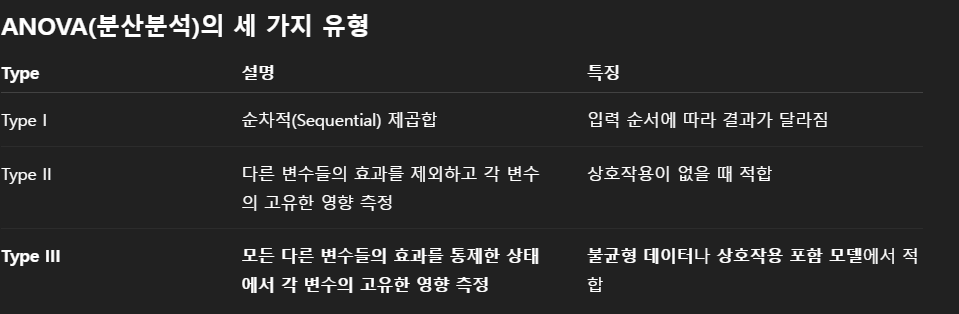

<언제 사용?>
- 실험 설계가 비균형(unbalanced) 한 경우
- 모델에 상호작용(interaction) 항이 포함된 경우
- 변수의 순서에 영향을 받지 않는 분석이 필요할 때

## 1. 귀무가설과 대립가설 설정하시오.

- 1. 노선 - 승객수 영향
  - 귀무가설: 지하철 노선별 승객 수의 평균은 같다.(또는 차이가 없다.)
  - 대립가설: 지하철 노선별 승객 수의 평균은 다르다.(차이가 있다.)
- 2. 월 - 승객수 영향
  - 귀무가설: 월별 승객 수의 평균은 같다.(또는 차이가 없다.)
  - 대립가설: 월별 승객 수의 평균은 다르다.(차이가 있다.)
  
- 상호작용 효과(1, 2)
  - 귀무가설: 노선과 월 간 상호작용 효과가 없다.
  - 대립가설: 노선과 월 간 상호작용 효과가 있다. .

In [44]:
df7 = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/27_problem9.csv')
df7.info()
display(df7.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   line    72 non-null     int64
 1   month   72 non-null     int64
 2   total   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


## 2. 검정통계량을 구하고, 대립가설 채택여부를 기술하시오.

In [45]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

#일단 line과 month는 수치형에 적합하지 않으므로 object 변환
df7 = df7.astype({'line':'object', 
                 'month': 'object'})

model = ols('total ~ C(line) * C(month)', data=df7).fit()

# 3 anova

anova_rt = anova_lm(model, typ=3)

print(anova_rt)

                        sum_sq    df             F        PR(>F)
Intercept         3.466344e+06   1.0  33455.335657  4.849033e-55
C(line)           1.336630e+05   2.0    645.022520  6.417946e-29
C(month)          3.942483e+04  11.0     34.591616  7.896179e-16
C(line):C(month)  9.696908e+04  22.0     42.540665  1.582232e-19
Residual          3.730000e+03  36.0           NaN           NaN


***유의수준 5%(신뢰수준95%) 결과**
- 노선-승객수: p-value가 6.417946e-29로 0.05보다 작으므로 유의함(귀무가설 기각)
- 월-승객수: p-value가 7.896179e-16로 0.05보다 작으므로 유의함(귀무가설 기각)
- 상호작용: p-value가 1.582232e-19로 0.05보다 작으므로 유의함(귀무가설 기각)

***결론**

지하철 노선, 월별 승객 수의 차이가 있다. 

또한 노선과 월별 유의미한 상호작용이 있다.


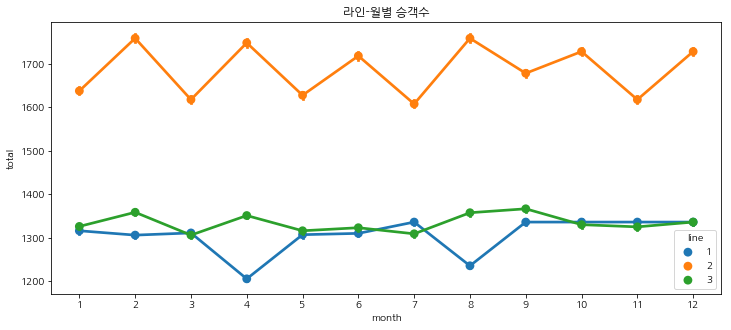

In [46]:
# 시각화: sns.pointplot

plt.figure(figsize=(12, 5))

sns.pointplot(data=df7, x='month', y='total', hue='line', marker='o')
plt.title('라인-월별 승객수')

plt.show()